# Implement the Image classification CNN model for classifying hand-written MNIST dataset by dividing the model into following 4 stages:
* a. Loading and preprocessing the image data
* b. Defining the model's architecture
* c. Training the model
* d. Estimating the model's performance

# a. Loading and preprocessing the image data


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [12]:
mnist_train=pd.read_csv('../datasets/MNIST(Ass2&3)/mnist_train.csv')
x_train=mnist_train.drop('label',axis=1).values
y_train=mnist_train['label'].values

print(x_train.shape)
print(y_train.shape)

(60000, 784)
(60000,)


In [13]:
mnist_test=pd.read_csv('../datasets/MNIST(Ass2&3)/mnist_test.csv')
x_test=mnist_test.drop('label',axis=1).values
y_test=mnist_test['label'].values

print(x_test.shape)
print(y_test.shape)

(10000, 784)
(10000,)


In [14]:
# Normalize pixel values to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the images to a 1D array (for MNIST)
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [15]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [20]:
model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=(28,28,1,),activation='relu'))
model.add(MaxPooling2D(2))
model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               692352    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [21]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])
H=model.fit(x_train,y_train, 128, 5, validation_data=(x_test, y_test))

Epoch 1/5
469/469 [==============================] - 14s 29ms/step - loss: 0.2253 - accuracy: 0.9361 - val_loss: 0.0850 - val_accuracy: 0.9749
Epoch 2/5
469/469 [==============================] - 14s 29ms/step - loss: 0.0686 - accuracy: 0.9799 - val_loss: 0.0550 - val_accuracy: 0.9826
Epoch 3/5
469/469 [==============================] - 14s 30ms/step - loss: 0.0455 - accuracy: 0.9864 - val_loss: 0.0442 - val_accuracy: 0.9844
Epoch 4/5
469/469 [==============================] - 14s 31ms/step - loss: 0.0335 - accuracy: 0.9895 - val_loss: 0.0475 - val_accuracy: 0.9835
Epoch 5/5
469/469 [==============================] - 14s 31ms/step - loss: 0.0244 - accuracy: 0.9930 - val_loss: 0.0399 - val_accuracy: 0.9870


In [22]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0399 - accuracy: 0.9870


[0.03990432620048523, 0.9869999885559082]

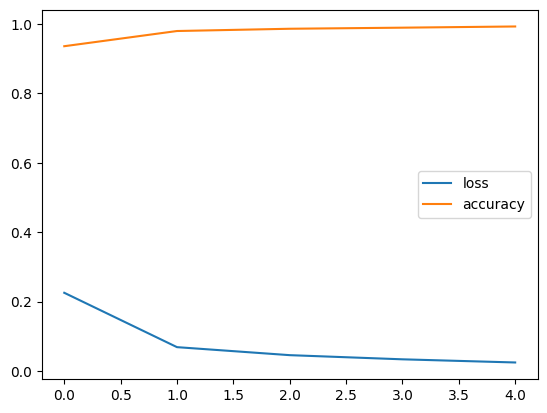

In [23]:
plt.plot(H.history['loss'],label=('loss'))
plt.plot(H.history['accuracy'],label=('accuracy'))
plt.legend()
plt.show()

313/313 [==============================] - 1s 3ms/step
Actual Number:  0
Predicted Number:  0


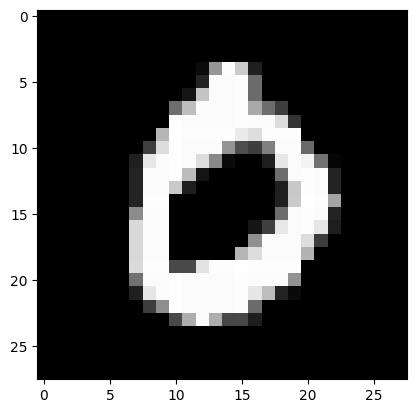

In [24]:
n = 3
plt.imshow(x_test[n].reshape(28, 28), "gray")

predicted_value = model.predict(x_test)

print("Actual Number: ",np.argmax(y_test[n]))
print("Predicted Number: ", np.argmax(predicted_value[n]))